## Nested Chinese Restaurant Processes

Reference: Blei, et al. (2010)  
"The Nested Chinese Restaurant Process and Bayesian Nonparametric Inference of Topic Hierarchies."  
https://cocosci.berkeley.edu/tom/papers/ncrp.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from stochastic_utils import NCRP, plot_ncrp_subtree, plot_ncrp_animation, GEM, nice_hist

In [3]:
np.random.seed(1)

In [4]:
ncrp = NCRP(alpha = 2.0)

In [5]:
seating = ncrp.simulate(n_rounds=50, truncate_level=2)
print seating

[(0, 0), (1, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (2, 1), (0, 1), (3, 0), (4, 0), (0, 0), (0, 2), (0, 0), (5, 0), (0, 1), (0, 1), (4, 0), (2, 2), (2, 1), (3, 0), (0, 3), (0, 0), (0, 0), (2, 1), (0, 0), (0, 0), (0, 0), (2, 0), (0, 1), (0, 0), (0, 1), (0, 4), (0, 4), (0, 0), (2, 1), (0, 4), (0, 1), (2, 3), (0, 1), (0, 0), (4, 0), (6, 0), (2, 2), (0, 5)]


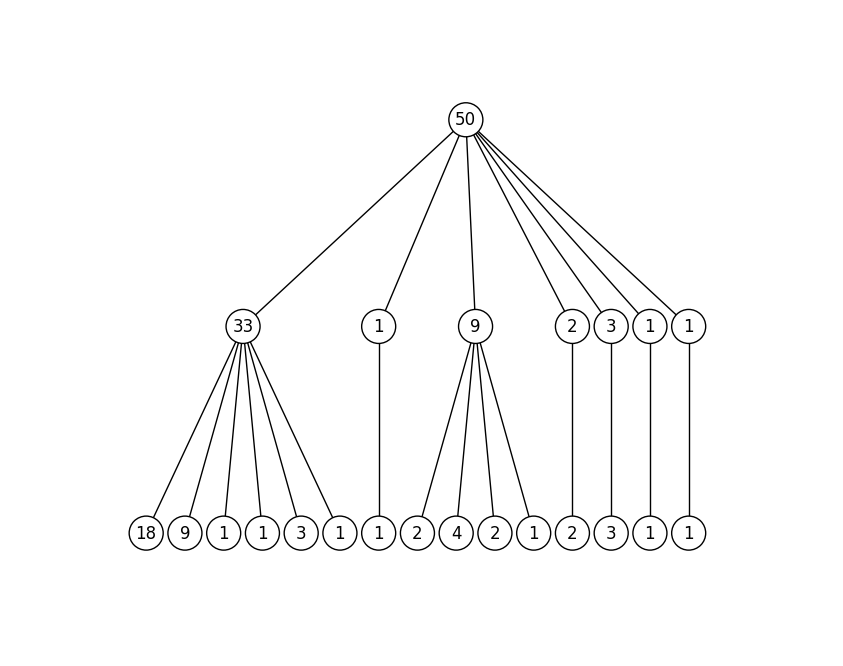

In [6]:
plot_ncrp_subtree(seating)

In [7]:
anim = plot_ncrp_animation(seating[:20])
plt.close()

In [8]:
# # Uncomment this cell to save file
# anim.save("./animation_test.gif", fps=2, writer='imagemagick')
# plt.close()

In [9]:
# # Uncomment this cell to display animation inline
# # (Avoid committing this to version control unless necessary)

# from IPython.display import HTML

# html_anim = anim.to_html5_video()
# plt.close()
# HTML(html_anim)

### GEM distribution (stick-breaking construction)
The paper uses a 2-parameter variant of the GEM distribution (named after Griffiths, Engen, and McCloskey), which is a distribution over distributions over non-negative integers.

In the context of learning hierarchical topic models, we sample from a GEM distribution once per document.  The result defines a distribution over "levels of abstraction" in the infinite topic hierarchy.

In [10]:
%%time
n_trials = 10000
gem_results = np.zeros(n_trials, dtype='float')
gem = GEM(m = 0.5, pi = 100)
distrib = gem.draw()
for i in range(n_trials):
    gem_results[i] = distrib.draw()

CPU times: user 20.9 ms, sys: 501 µs, total: 21.4 ms
Wall time: 22.9 ms


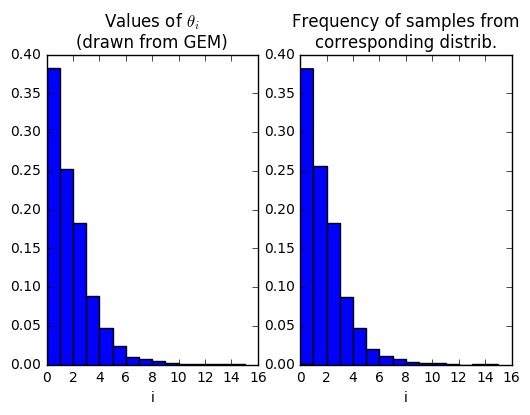

In [11]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(np.arange(len(distrib.cached_thetas)), distrib.cached_thetas, width=1)
ax[0].set_title(r"Values of $\theta_i$" + "\n(drawn from GEM)")
ax[0].set_xlabel("i")

nice_hist(gem_results, normed=True, ax=ax[1])
ax[1].set_title("Frequency of samples from\ncorresponding distrib.")
ax[1].set_xlabel("i")

None